In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.utils.data as td
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

torch.manual_seed(0)
data_path = 'content'
version = 4

In [5]:
df = pd.read_csv(f'{data_path}/data.csv')
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [6]:
target = 'Air Quality'
features = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']

# dict = { key : value for value, key in enumerate(df['Air Quality'].value_counts().index)}
# df[target] = df['Air Quality'].map(dict)
df = df[features + [target]]
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [7]:
max_values = df.drop(columns=[target]).max()  
df.iloc[:, :-1] = df.iloc[:, :-1] / max_values

/var/folders/10/vcvbnp396238kmcwww0pldcc0000gn/T/ipykernel_1216/2767821176.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.333333
1       0.638454
2       0.646813
3       0.575758
4       0.316614
          ...   
4995    0.799373
4996    0.740857
4997    0.396029
4998    0.251829
4999    0.481714
Name: Population_Density, Length: 5000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = df.iloc[:, :-1] / max_values


In [8]:
# make target one-hot
df = pd.get_dummies(df, columns=[target], prefix='', prefix_sep='')
df.head(200)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Good,Hazardous,Moderate,Poor
0,0.508532,0.461358,0.017627,0.056681,0.291217,0.204900,0.462366,0.244186,0.333333,False,False,True,False
1,0.482935,0.590164,0.007797,0.038632,0.474576,0.216036,0.440860,0.232558,0.638454,False,False,True,False
2,0.394198,0.583138,0.090508,0.107030,0.375963,0.280624,0.438172,0.201550,0.646813,False,False,True,False
3,0.462457,0.305230,0.020678,0.019949,0.208012,0.118040,0.309140,0.430233,0.575758,True,False,False,False
4,0.452218,0.551913,0.023390,0.050665,0.337442,0.124722,0.271505,0.492248,0.316614,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.554608,0.416862,0.155593,0.166878,0.419106,0.240535,0.325269,0.290698,0.536050,False,False,True,False
196,0.418089,0.508977,0.028136,0.045282,0.231125,0.120267,0.268817,0.434109,0.384535,True,False,False,False
197,0.498294,0.581577,0.066441,0.102280,0.451464,0.175947,0.392473,0.457364,0.657262,False,False,True,False
198,0.617747,0.662763,0.143051,0.227992,0.476117,0.521158,0.532258,0.135659,0.646813,False,True,False,False


In [19]:
df[df['Hazardous'] == True]

,CO,NO2,Population_Density,Proximity_to_Industrial_Areas,Temperature,Good,Hazardous,Moderate,Poor
5,0.489247,0.661017,0.704284,0.120155,0.672355,False,True,False,False
29,0.620968,0.486903,0.820272,0.112403,0.895904,False,True,False,False
30,0.478495,0.432974,0.587252,0.135659,0.762799,False,True,False,False
39,0.569892,0.624037,0.639498,0.189922,0.568259,False,True,False,False
40,0.701613,0.608629,0.938349,0.096899,0.639932,False,True,False,False
...,...,...,...,...,...,...,...,...,...
4981,0.752688,0.462250,0.571578,0.302326,0.708191,False,True,False,False
4986,0.548387,0.489985,0.791014,0.806202,0.607509,False,True,False,False
4989,0.481183,0.855162,0.806688,0.116279,0.757679,False,True,False,False
4990,0.879032,0.520801,0.615465,0.143411,0.798635,False,True,False,False


In [9]:
target = ['Good', 'Hazardous', 'Moderate', 'Poor']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df[features].values,
                                                    df[target].values,
                                                    test_size=0.20,
                                                    random_state=0,
                                                    stratify=df[target])

x_train


array([[0.51877133, 0.6245121 , 0.0359322 , ..., 0.23387097, 0.48449612,
        0.48484848],
       [0.5221843 , 0.51209992, 0.09728814, ..., 0.39784946, 0.32170543,
        0.40020899],
       [0.46757679, 0.64715066, 0.04474576, ..., 0.33064516, 0.23255814,
        0.56321839],
       ...,
       [0.51023891, 0.58235753, 0.01830508, ..., 0.26344086, 0.49224806,
        0.27481714],
       [0.75085324, 0.65651835, 0.13389831, ..., 0.66666667, 0.15503876,
        0.553814  ],
       [0.47098976, 0.48790008, 0.02949153, ..., 0.27419355, 0.40310078,
        0.24555904]], shape=(4000, 9))

In [11]:
class AirQualityNet(torch.nn.Module):
    def __init__(self):
        super(AirQualityNet, self).__init__()
        self.fc1 = torch.nn.Linear(9, 10)
        self.fc2 = torch.nn.Linear(10, 10)
        self.fc3 = torch.nn.Linear(10, 10)
        self.fc4 = torch.nn.Linear(10, 4)  # Output 4 values for 4 classes
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # No activation, raw logits will be passed to BCEWithLogitsLoss
        return x
    
    def predict(self, x):
        x = self.forward(x)
        return torch.sigmoid(x) > 0.5

In [12]:
def train(model, data_loader, optimizer, loss_criteria):
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, _target = tensor
        optimizer.zero_grad()
        
        out = model(data)
        loss = loss_criteria(out, _target)  # Ensure _target is float and matches output shape
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = train_loss / (batch + 1)
    print(f'Training set: Average loss: {avg_loss:.6f}')
    return avg_loss

def test(model, data_loader, loss_criteria):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0  # To keep track of total number of samples

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, _target = tensor
            
            out = model(data)
            test_loss += loss_criteria(out, _target).item()

            predicted = model.predict(data)  # Apply threshold to get binary predictions
            correct += (predicted == _target).sum().item()
            total += _target.numel()  # Add the total number of elements (binary outputs)

    avg_loss = test_loss / batch_count
    accuracy = 100. * correct / total  # Correctly divide by total elements

    print(f'Validation set: Average loss: {avg_loss:.6f}, Accuracy: {correct}/{total} ({accuracy:.2f}%)\n')
    return avg_loss

In [13]:
train_x = torch.tensor(x_train, dtype=torch.float32)
train_y = torch.tensor(y_train, dtype=torch.float32)

# Create dataset and dataloader
train_ds = td.TensorDataset(train_x, train_y)
train_loader = td.DataLoader(train_ds, batch_size=10, shuffle=True, num_workers=1)

# Convert x_test and y_test to tensors
test_x = torch.tensor(x_test, dtype=torch.float32)
test_y = torch.tensor(y_test, dtype=torch.float32)

# Create dataset and dataloader
test_ds = td.TensorDataset(test_x, test_y)
test_loader = td.DataLoader(test_ds, batch_size=10, shuffle=False, num_workers=1)

In [16]:
model = AirQualityNet()
model

AirQualityNet(
  (fc1): Linear(in_features=9, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=4, bias=True)
)

In [17]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Use BCEWithLogitsLoss for binary classification
loss_criteria = nn.BCEWithLogitsLoss()

epochs = 20
for epoch in range(1, epochs + 1):
    print(f'Epoch: {epoch}')
    train_loss = train(model, train_loader, optimizer, loss_criteria)
    test_loss = test(model, test_loader, loss_criteria)

Epoch: 1
Training set: Average loss: 0.594048
Validation set: Average loss: 0.533353, Accuracy: 3000/4000 (75.00%)

Epoch: 2
Training set: Average loss: 0.458560
Validation set: Average loss: 0.323610, Accuracy: 3374/4000 (84.35%)

Epoch: 3
Training set: Average loss: 0.292245
Validation set: Average loss: 0.271809, Accuracy: 3423/4000 (85.58%)

Epoch: 4
Training set: Average loss: 0.250586
Validation set: Average loss: 0.214378, Accuracy: 3600/4000 (90.00%)

Epoch: 5
Training set: Average loss: 0.192595
Validation set: Average loss: 0.168899, Accuracy: 3735/4000 (93.38%)

Epoch: 6
Training set: Average loss: 0.164915
Validation set: Average loss: 0.151894, Accuracy: 3705/4000 (92.62%)

Epoch: 7
Training set: Average loss: 0.153753
Validation set: Average loss: 0.142213, Accuracy: 3713/4000 (92.83%)

Epoch: 8
Training set: Average loss: 0.147095
Validation set: Average loss: 0.147626, Accuracy: 3763/4000 (94.08%)

Epoch: 9
Training set: Average loss: 0.143662
Validation set: Average lo

In [ ]:
acc = 96
version = 3
model_file = f'air_quality_v{version}_acc_{acc}.pt'
torch.save(model.state_dict(), model_file)
del model

In [ ]:
acc = 96
version = 3
model_file = f'air_quality_v{version}_acc_{acc}.pt'
model = AirQualityNet()
model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

In [82]:
import torch

# Assuming your model is already trained
model.eval()  # Set the model to evaluation mode

def predict_single(model, input_data):
    # Ensure the input data is in the correct shape
    input_data = torch.tensor(input_data, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
    
    # Get predictions from the model
    with torch.no_grad():
        prediction = model.predict(input_data)  # Output is a tensor of booleans (binary)
    
    # Map the predicted boolean values to class labels
    predicted_classes = [target[i] for i in range(len(prediction[0])) if prediction[0][i]]
    
    return predicted_classes

# Example: Predicting for a single sample
new_data = [0.30376344, 0.41140216, 0.2476489 , 0.47674419, 0.39761092]  # Example features for a new sample
predicted_classes = predict_single(model, new_data)

print(f'Predicted Air Quality: {predicted_classes}')


Predicted Air Quality: ['Good']


In [83]:
X, y = train_test_split(df[features + target], test_size=0.20, random_state=0, stratify=df[target])
[y[features].values, y[target].values]

#test for the first 10 samples
for i in range(len(y)):
    actual_class = [target[j] for j in range(len(y[target].values[i])) if y[target].values[i][j]]
    if actual_class[0] == 'Poor':
        new_data = y[features].values[i]
        predicted_class = predict_single(model, new_data)
        print(f'Predicted Air Quality: {predicted_class}, Actual Air Quality: {actual_class[0]}')

Predicted Air Quality: ['Hazardous'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Moderate'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Hazardous'], Actual Air Quality: Poor
Predicted Air Quality: ['Hazardous'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quality: Poor
Predicted Air Quality: ['Moderate'], Actual Air Quality: Poor
Predicted Air Quality: ['Poor'], Actual Air Quali

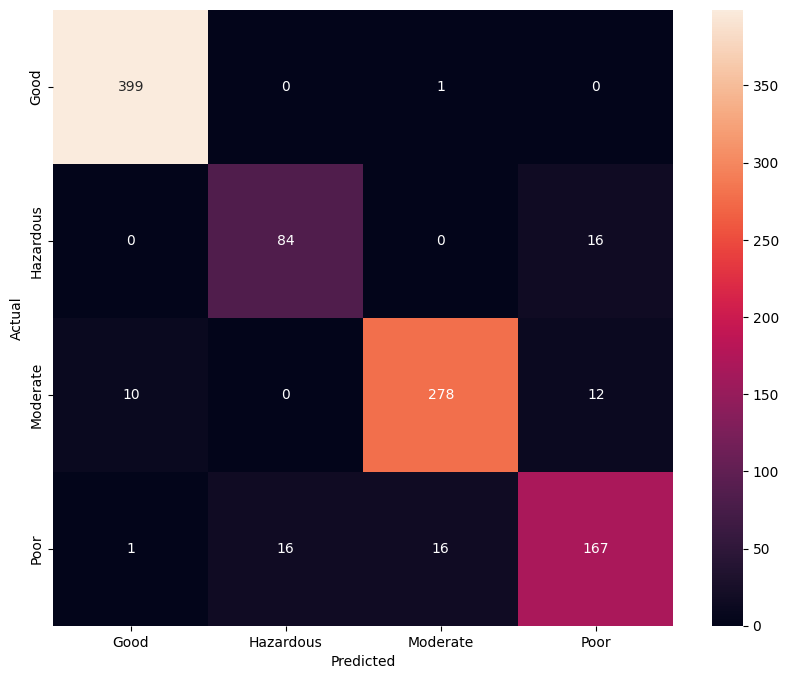

In [84]:
# Confusion matrix with heatmap
y_pred = model.predict(test_x)
y_pred = y_pred.numpy().astype(int)
y_true = test_y.numpy().astype(int)
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target, yticklabels=target)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=target))

              precision    recall  f1-score   support

        Good       0.99      0.99      0.99       400
   Hazardous       0.84      0.84      0.84       100
    Moderate       0.94      0.93      0.93       300
        Poor       0.84      0.84      0.84       200

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.93      0.93      0.93      1000
 samples avg       0.93      0.93      0.93      1000



/Users/kazimashry/Documents/DNN_learn/MS_DNN_Practice/DNN_kaggle_air_quality/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

def compute_accuracy(model, test_x, test_y):
    model.eval()  # Set the model to evaluation mode
    
    # Ensure the input data is in tensor format
    test_x = torch.tensor(test_x, dtype=torch.float32)
    test_y = torch.tensor(test_y, dtype=torch.float32)

    with torch.no_grad():  # Disable gradient calculation for inference
        predictions = model.predict(test_x)  # Get the predicted binary values (True/False)

    # Convert the predictions and true labels to boolean for easier comparison
    correct_predictions = (predictions == test_y).sum().item()  # Compare predictions to true labels

    # Calculate accuracy as the fraction of correct predictions
    accuracy = correct_predictions / (len(test_y) * len(test_y[0]))
    
    print(f'Overall accuracy: {accuracy * 100:.2f}%')
    return accuracy

# Example usage (make sure test_x and test_y are properly loaded)
accuracy = compute_accuracy(model, test_x, test_y)


Overall accuracy: 96.50%


/var/folders/10/vcvbnp396238kmcwww0pldcc0000gn/T/ipykernel_3000/2552956653.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_x = torch.tensor(test_x, dtype=torch.float32)
/var/folders/10/vcvbnp396238kmcwww0pldcc0000gn/T/ipykernel_3000/2552956653.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_y = torch.tensor(test_y, dtype=torch.float32)
